In [16]:
#Importing all libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

# Model Definition

In [17]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.05):
    
    #initialize weights
    nx = X_train.shape[0]
    initial_w, initial_b = initialize_with_zeros(nx)
    
    #perform the training
    final_params = optimize(X_train, Y_train, initial_w, initial_b, num_iterations, learning_rate)
    final_w = final_params["w"]
    final_b = final_params["b"]
    
    #make predictions
    Y_train_predict = predict(X_train, final_w, final_b)
    Y_test_predict = predict(X_test, final_w, final_b)
    
    #print out accuracy
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_predict - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_test_predict - Y_test)) * 100))
    
    #save final params in a variable
    return final_params

# Data

In [18]:
#Import the data
train_dataset = h5py.File('datasets/train_catvnoncat.h5', 'r')
test_dataset = h5py.File('datasets/test_catvnoncat.h5', 'r')

train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y_orig = np.array(train_dataset["train_set_y"][:])
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y_orig = np.array(test_dataset["test_set_y"][:])

train_set_y_orig = train_set_y_orig.reshape(1, train_set_y_orig.shape[0])
test_set_y_orig = test_set_y_orig.reshape(1, test_set_y_orig.shape[0])

classes = np.array(test_dataset["list_classes"][:])

In [19]:
#Preprocess the data
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

#Normalize the data
train_set_x_flatten = train_set_x_flatten/255
test_set_x_flatten = test_set_x_flatten/255

# Run the model

In [20]:
final_params = model(train_set_x_flatten, train_set_y_orig, test_set_x_flatten, test_set_y_orig, 2000, 0.05)

train accuracy: 100.0 %
test accuracy: 66.0 %


# Test the model

y = 1.0, your algorithm predicts a "cat" picture.


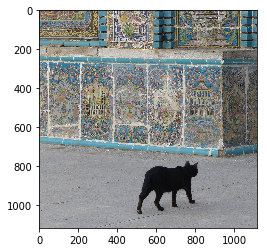

In [23]:
my_image = "cat_in_iran.jpg"

#load and process image
fname = "testImages/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T

#predict
my_predicted_image = predict(my_image, final_params["w"], final_params["b"])

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

# Supporting Functions

In [7]:
#Initialize weights
def initialize_with_zeros(nx):
    initial_w = np.zeros((nx, 1), dtype=float)
    initial_b = 0
    return initial_w, initial_b

In [8]:
def optimize(X, Y, w, b, num_iterations, learning_rate):
    for i in range(num_iterations):
        grads = propagate(X, Y, w, b)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
    params = {
        "w" : w,
        "b" : b
    }
    return params

In [9]:
def propagate(X, Y, w, b):
    A = sigmoid(np.dot(w.T, X) + b)
    m = X.shape[1]
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)
    grads = {
        "dw" : dw,
        "db" : db
    }
    return grads

def sigmoid(z):
    H = 1 / (1 + np.exp(-z))
    return H

In [10]:
def predict(X, w, b):
    Y_predict = sigmoid(np.dot(w.T, X) + b)
    for i in range(Y_predict.shape[1]):
        if Y_predict[0, i] > 0.5:
            Y_predict[0, i] = 1
        else:
            Y_predict[0, i] = 0
    return Y_predict